In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras.optimizers import Adam

In [2]:
# 같은 주기로 반복하는 1000개의 데이터 생성
x = np.arange(0, 100, 0.1)
y = 0.5 * np.sin(2*x) - np.cos(x/2)

# (1000, 1) 행렬로 변환
seq_data = y.reshape(-1, 1)
print(seq_data.shape)

(1000, 1)


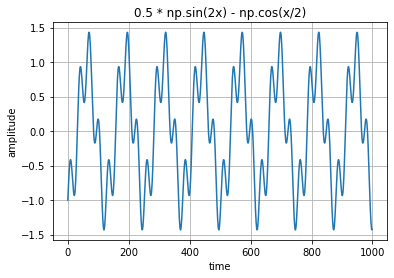

In [3]:
plt.grid()
plt.title('0.5 * np.sin(2x) - np.cos(x/2)')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.plot(seq_data)
plt.show()

In [4]:
def seq2dataset(seq, window, horizon):
    X = []  # 입력 데이터를 저장하는 list
    Y = []  # 정답 데이터를 저장하는 list

    for i in range(len(seq) - (window + horizon) + 1):
        x = seq[i: (i + window)]  # 슬라이싱으로 x 데이터 생성
        y = (seq[i + window + horizon - 1])

        X.append(x)
        Y.append(y)

    return np.array(X), np.array(Y)

In [5]:
w = 20  # window size
h = 1   # horizon factor

X, Y = seq2dataset(seq_data, w, h)
print(X.shape, Y.shape)
# X.shape = (batch_size, time_steps, imput_dims)

(980, 20, 1) (980, 1)


In [6]:
split_ratio = 0.8
split = int(split_ratio * len(X))

x_train = X[0:split]
y_train = Y[0:split]

x_test = X[split:]
y_test = Y[split:]

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(784, 20, 1) (784, 1) (196, 20, 1) (196, 1)


In [7]:
model = Sequential()
model.add(SimpleRNN(units=128, activation='tanh',
                    input_shape=x_train[0].shape))
                                # x_train[0].shape = (20, 1)
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 128)               16640     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 16,769
Trainable params: 16,769
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='mse', optimizer=Adam(), metrics=['mae'])
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 19ms/step - loss: 0.0842 - mae: 0.1950 - val_loss: 0.0110 - val_mae: 0.0915
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0048 - mae: 0.0545 - val_loss: 0.0020 - val_mae: 0.0370
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0013 - mae: 0.0276 - val_loss: 0.0010 - val_mae: 0.0248
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 7.2252e-04 - mae: 0.0209 - val_loss: 5.7826e-04 - val_mae: 0.0178
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 4.8267e-04 - mae: 0.0169 - val_loss: 5.9351e-04 - val_mae: 0.0200
Epoch 6/100
25/25 [==============================] - 0s 7ms/step - loss: 3.5954e-04 - mae: 0.0146 - val_loss: 2.6816e-04 - val_mae: 0.0122
Epoch 7/100
25/25 [==============================] - 0s 7ms/step - loss: 2.9625e-04 - mae: 0.0136 - val_loss: 2.6363e-04 - val_mae: 0.0132
Epoch 8/100
25/25 [==============================]

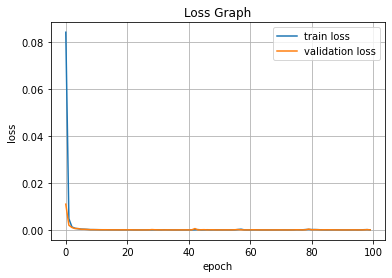

In [9]:
plt.title('Loss Graph')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.grid()
plt.legend(loc='best')
plt.show()

In [14]:
pred = model.predict(x_test)
print(pred.shape)

rand_idx = np.random.randint(0, len(y_test), size=5)
print('rand_idx =', rand_idx)
print('pred =', pred.flatten()[rand_idx])
print('label =', y_test.flatten()[rand_idx])

7/7 [==============================] - 0s 2ms/step
(196, 1)
rand_idx = [135  45  50   1  46]
pred = [0.6741548  0.04319254 0.1768956  0.4865     0.08940664]
label = [0.6645118  0.03820471 0.17268088 0.47934463 0.08494103]


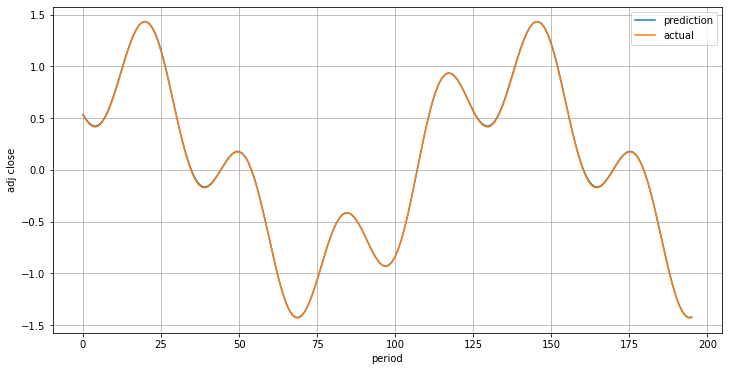

In [16]:
plt.figure(figsize=(12, 6))
plt.xlabel('period')
plt.ylabel('adj close')
plt.plot(pred, label='prediction')
plt.plot(y_test, label='actual')
plt.grid()
plt.legend(loc='best')
plt.show()

# 예측과 결과가 거의 동일해서 겹쳐서 보임

In [11]:
# 평균 절대값 백분율 오차 계산(MAPE)
print(np.sum(abs(y_test-pred)/y_test)/len(x_test))

0.0016333791468428594
